# Ensemble Techniques

#### These are the mostly used Ensembles in Machine Learning

- Voting Ensembles
- Stacking
- Bagging (Bootstrap Aggregation) - Random Forest
- Cascading
- Boosting - AdaBoost, GBDT and XGBoost

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('credit_card_defaulter.csv')

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## About the Problem
Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
df['defaulted'].value_counts()

0    23364
1     6636
Name: defaulted, dtype: int64

In [6]:
df['defaulted'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: defaulted, dtype: float64

## Building the Model - Stacking

In [7]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Identifying the target variable
X = df.drop('defaulted',axis=1)
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [8]:
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

estimators = [
    ('lr', LogisticRegression()),
    ("knn",KNeighborsClassifier(10)),
    ('dt',DecisionTreeClassifier(random_state=42))
]

stack_classifier = StackingClassifier(estimators=estimators,
                                      final_estimator=DecisionTreeClassifier())

stack_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=DecisionTreeClassifier())

In [9]:
predictions = stack_classifier.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.6848888888888889

********** Conf Matrix **********
[[5567 1433]
 [1403  597]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7000
           1       0.29      0.30      0.30      2000

    accuracy                           0.68      9000
   macro avg       0.55      0.55      0.55      9000
weighted avg       0.69      0.68      0.69      9000




## Building the Model - RandomForest
1) Random **Bootstrap** Sampling with Replacement
- Column Sampling with Replacement
- Row Sampling with Replacement

2) **Base Learners** with High Variance and Low Bias i.e. Overfitted Models - **Fully Grown Decision Trees**

3) Aggregation
- Majority Voting (Classification Task)
- Mean or Median (Regression Task)

In [11]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
model_rf = RandomForestClassifier()

# Fit the random forest model
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
predictions = model_rf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8157777777777778

********** Conf Matrix **********
[[6630  370]
 [1288  712]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.66      0.36      0.46      2000

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000




# Hyperparameter for Random Forest
The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.

1. **n_estimators**: integer, optional (default=10): The number of trees in the forest.
        
2. criterion: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
        
3. max_features : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
- If int, then consider max_features features at each split.
- If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
- If “auto”, then max_features=sqrt(n_features).
- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
- If “log2”, then max_features=log2(n_features).
- If None, then max_features=n_features.
- Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
    
4. **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
5. min_samples_split : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
- If int, then consider min_samples_split as the minimum number.
- If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.

6. min_samples_leaf : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
- If int, then consider min_samples_leaf as the minimum number.**
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
8. min_weight_fraction_leaf : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
    
9. max_leaf_nodes : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
    
10. min_impurity_split : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

# Tuning max_depth

In [15]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'max_depth': range(2, 20, 5)}]

rf = RandomForestClassifier()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(2, 20, 5)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [16]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test, y_test))

Best parameters set found on train set
{'max_depth': 12}
RandomForestClassifier(max_depth=12)

Score on Test Data:  0.8175555555555556


In [17]:
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.881658,0.062436,0.036655,0.009684,2,{'max_depth': 2},0.801667,0.790714,0.800000,0.805000,...,0.800810,0.005571,4,0.798095,0.805952,0.799881,0.801548,0.802083,0.801512,0.002622
1,2.072215,0.112327,0.043084,0.006375,7,{'max_depth': 7},0.823333,0.810476,0.820238,0.818333,...,0.820000,0.005704,2,0.837381,0.838333,0.836429,0.838214,0.833810,0.836833,0.001659
2,3.052307,0.079360,0.068049,0.008325,12,{'max_depth': 12},0.823810,0.812381,0.819048,0.817857,...,0.820000,0.005015,1,0.886964,0.890298,0.887500,0.887440,0.886786,0.887798,0.001279
3,3.688383,0.153847,0.078353,0.009891,17,{'max_depth': 17},0.819524,0.811190,0.818095,0.814524,...,0.817952,0.005134,3,0.930179,0.928988,0.928988,0.929226,0.929167,0.929310,0.000445


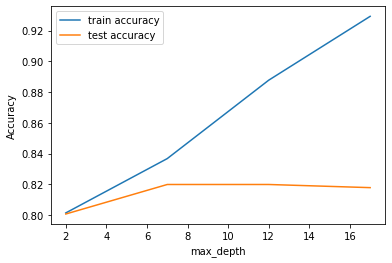

In [18]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

## Tuning n_estimators

In [19]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'n_estimators': range(10, 1300, 200)}]

rf = RandomForestClassifier()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': range(10, 1300, 200)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [21]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test, y_test))

Best parameters set found on train set
{'n_estimators': 610}
RandomForestClassifier(n_estimators=610)

Score on Test Data:  0.8151111111111111


In [22]:
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.444844,0.029824,0.014100,0.003049,10,{'n_estimators': 10},0.809524,0.803571,0.806667,0.801429,...,0.808143,0.006318,7,0.980298,0.981012,0.980119,0.980238,0.979167,0.980167,0.00059
1,9.771607,0.372298,0.220721,0.021768,210,{'n_estimators': 210},0.821429,0.809762,0.816905,0.818333,...,0.818667,0.005621,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
2,17.539439,0.557421,0.377972,0.009245,410,{'n_estimators': 410},0.822143,0.809286,0.816429,0.814762,...,0.817714,0.005812,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
3,26.240891,0.742380,0.565998,0.031566,610,{'n_estimators': 610},0.823571,0.812143,0.818333,0.818571,...,0.820095,0.005310,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
4,34.368392,0.582511,0.752221,0.056962,810,{'n_estimators': 810},0.822857,0.810000,0.819048,0.818095,...,0.819190,0.005382,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000


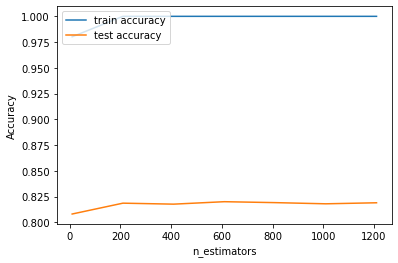

In [23]:
plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

# Fitting the final model with tunned hyperparameter

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=12,
                                  n_estimators=200)

model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200)

In [26]:
predictions = model_rf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8167777777777778

********** Conf Matrix **********
[[6671  329]
 [1320  680]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7000
           1       0.67      0.34      0.45      2000

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000




### Feature Importance with RandomForest

In [28]:
model_rf.feature_importances_

array([0.04405426, 0.04003136, 0.00580008, 0.01147072, 0.00759756,
       0.03478855, 0.18760831, 0.08436165, 0.05255193, 0.03910937,
       0.03635195, 0.02626694, 0.04404447, 0.03889995, 0.03543897,
       0.03452536, 0.03427163, 0.0349571 , 0.04359105, 0.03452815,
       0.03525512, 0.03040774, 0.03068758, 0.03340019])

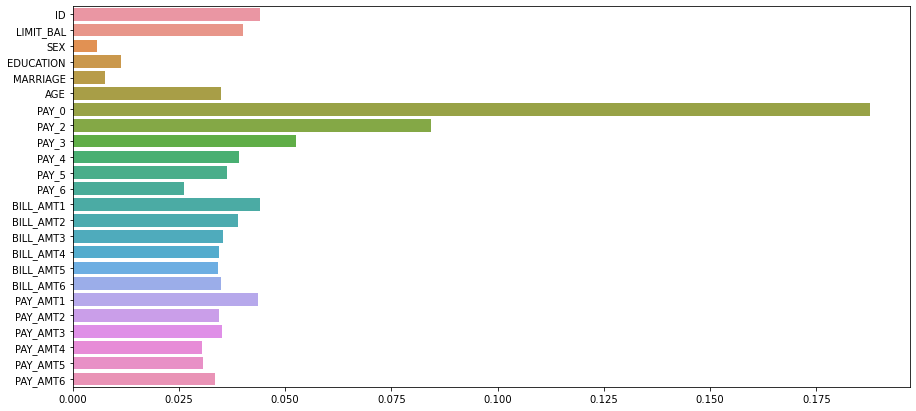

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_rf.feature_importances_, y = X_train.columns, )
plt.show();

## Building the Model - AdaBoost

In [30]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

In [31]:
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 42)

In [32]:
adaboost_classifier = AdaBoostClassifier(base_estimator=shallow_tree)

adaboost_classifier.fit(X_train, y_train)

predictions = adaboost_classifier.predict(X_test)

print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8117777777777778

********** Conf Matrix **********
[[6610  390]
 [1304  696]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7000
           1       0.64      0.35      0.45      2000

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000




# Hyperparameter Tuning for AdaBoost
Try to tune for learning_rate, base_estimator__max_depth and n_estimators in AdaBoost Algorithm **(Assignment)**

## Building the Model - GBDT

In [34]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [35]:
model_gbdt = GradientBoostingClassifier()

model_gbdt.fit(X_train, y_train)

GradientBoostingClassifier()

In [36]:
predictions = model_gbdt.predict(X_test)

In [37]:
print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8183333333333334

********** Conf Matrix **********
[[6661  339]
 [1296  704]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.67      0.35      0.46      2000

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000




# Hyperparameter Tuning for GBDT
Try to tune for learning_rate and sub_sample in GBDT **(Assignment)**

### Feature Importance with GBDT

In [38]:
model_gbdt.feature_importances_

array([0.01852865, 0.0212723 , 0.0012524 , 0.00786848, 0.00352235,
       0.00873091, 0.61826046, 0.09249316, 0.02894514, 0.02145874,
       0.01612144, 0.01367485, 0.03858525, 0.00855048, 0.00601357,
       0.00582476, 0.00165942, 0.00576271, 0.01740935, 0.01704924,
       0.01956807, 0.00840572, 0.00880886, 0.01023369])

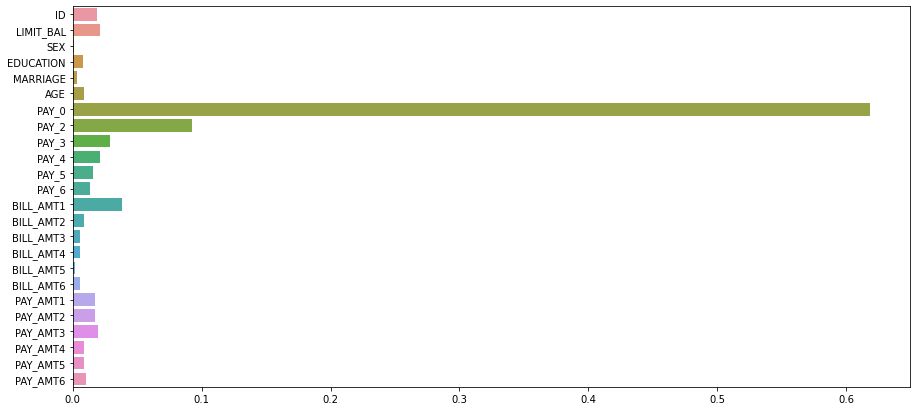

In [39]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_gbdt.feature_importances_, y = X_train.columns, )
plt.show();

## Building the Model - XGBoost

In [41]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

[12:56:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
predictions = model_xgb.predict(X_test)

In [44]:
print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.8145555555555556

********** Conf Matrix **********
[[6624  376]
 [1293  707]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.65      0.35      0.46      2000

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000




## Feature Importance with XGBoost

In [45]:
model_xgb.feature_importances_

array([0.01810522, 0.02102168, 0.0167668 , 0.02060773, 0.01819438,
       0.01784752, 0.35960266, 0.14317144, 0.04250496, 0.03721995,
       0.02761734, 0.03115837, 0.023221  , 0.01912986, 0.02018686,
       0.01909925, 0.01851674, 0.01798866, 0.01965255, 0.02304265,
       0.02498916, 0.02123488, 0.01927298, 0.01984731], dtype=float32)

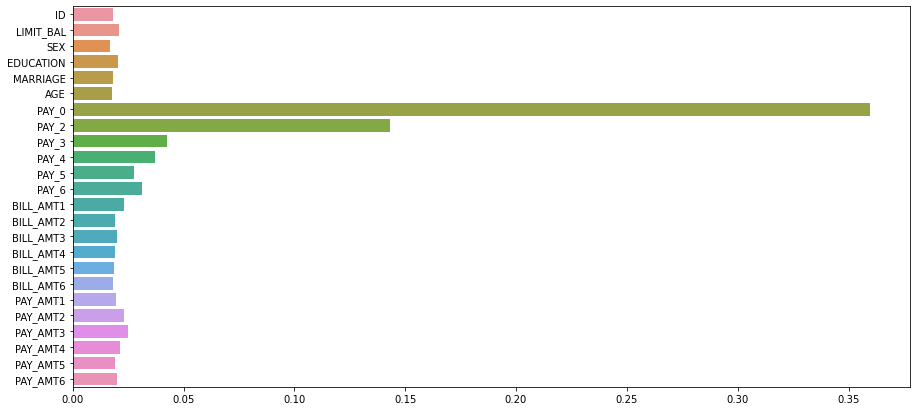

In [46]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_xgb.feature_importances_, y = X_train.columns, )
plt.show();